In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data = pd.read_csv("student-por.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [34]:
data.G3 = np.square(data.G3)
stats.normaltest(data.G3.values)

NormaltestResult(statistic=21.9683925756398, pvalue=1.696774637919711e-05)

(array([ 65., 308., 145.,  85.,  46.]),
 array([  0. ,  72.2, 144.4, 216.6, 288.8, 361. ]),
 <BarContainer object of 5 artists>)

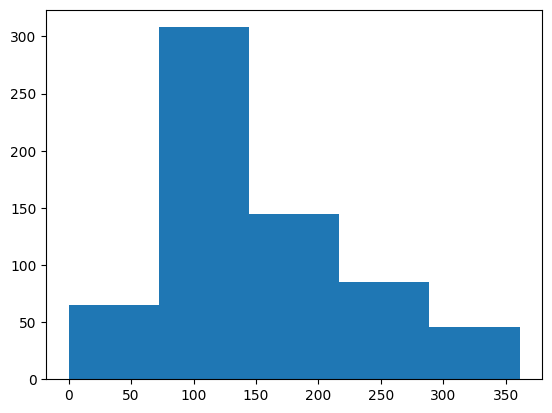

In [35]:
plt.hist(data.G3, bins=5)

In [36]:
y = data.G3
y

0      121.0
1      121.0
2      144.0
3      196.0
4      169.0
       ...  
644    100.0
645    256.0
646     81.0
647    100.0
648    121.0
Name: G3, Length: 649, dtype: float64

In [40]:
x = data.drop(['G3'], axis = 1)

In [41]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [49]:
cat_features = x.select_dtypes(include=['object']).columns
cat_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [50]:
ohe = OneHotEncoder(sparse_output=False)
cat_data_encoded = ohe.fit_transform(x[cat_features])
cat_data_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [54]:
type(cat_data_encoded)
cat_data_encoded = pd.DataFrame(cat_data_encoded, columns= ohe.get_feature_names_out(cat_features))
cat_data_encoded

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
646,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
647,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [55]:
x = x.drop(cat_features, axis = 1)

In [58]:
x = pd.concat([x.reset_index(drop=True),cat_data_encoded.reset_index(drop=True)], axis=1)
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,0,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,18,3,1,1,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
646,18,1,1,2,2,0,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
647,17,3,1,2,1,0,2,4,5,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [74]:
num_features = x.select_dtypes(include=['int64','float64']).columns
num_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [75]:
scaler = StandardScaler()
scaler

StandardScaler()

In [76]:
num_features_data = scaler.fit_transform(x[num_features])

In [79]:
num_features = pd.DataFrame(num_features_data, columns=num_features)
num_features

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,0.971140,-0.971140,-0.495663,0.495663,-0.344914,0.344914,1.816043,-1.816043,0.763496,-0.763496
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,0.971140,-0.971140,2.017502,-2.017502,-0.344914,0.344914,-0.550648,0.550648,0.763496,-0.763496
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,0.971140,-0.971140,-0.495663,0.495663,-0.344914,0.344914,-0.550648,0.550648,0.763496,-0.763496
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,-1.029717,1.029717,-0.495663,0.495663,-0.344914,0.344914,-0.550648,0.550648,-1.309764,1.309764
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,0.971140,-0.971140,-0.495663,0.495663,-0.344914,0.344914,1.816043,-1.816043,0.763496,-0.763496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,1.119748,0.780478,-1.008546,-0.543555,...,-1.029717,1.029717,2.017502,-2.017502,-0.344914,0.344914,-0.550648,0.550648,0.763496,-0.763496
645,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,0.971140,-0.971140,-0.495663,0.495663,-0.344914,0.344914,-0.550648,0.550648,0.763496,-0.763496
646,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,-3.068820,-2.075896,-1.859711,-0.543555,...,-1.029717,1.029717,-0.495663,0.495663,-0.344914,0.344914,1.816043,-1.816043,0.763496,-0.763496
647,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,-2.021678,0.780478,1.544950,1.620662,...,0.971140,-0.971140,2.017502,-2.017502,-0.344914,0.344914,-0.550648,0.550648,0.763496,-0.763496


In [80]:
x =  pd.concat([cat_data_encoded, num_features], axis=1)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
model = LinearRegression()
model

LinearRegression()

In [86]:
model.fit(x_train, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(x_test)

In [88]:
y_test

636    361.0
220    144.0
594    324.0
429    121.0
72     121.0
       ...  
514     49.0
374    289.0
444    121.0
244    144.0
601    100.0
Name: G3, Length: 130, dtype: float64

In [89]:
y_pred

array([305.   , 148.875, 317.   , 132.   , 145.25 , 260.25 , 287.5  ,
       106.25 , 123.875, 120.75 , 313.75 , 145.   , 170.25 ,  86.25 ,
       142.25 , 198.875, 156.75 ,  66.25 , 235.75 , 222.   , 230.125,
       200.375, 213.125, 166.75 , 215.75 , 175.   ,  76.875, 139.5  ,
       138.   , 229.375, 249.5  , 180.5  ,  57.5  ,  42.125, 292.   ,
       218.5  , 195.5  , 226.75 , 185.125, 142.25 , 183.25 , 144.75 ,
        78.5  , 160.5  , 183.75 , 162.875, 298.25 , 143.   , 158.125,
       143.875, 138.25 , 125.   , 200.   , 114.75 , 120.5  , 291.125,
        68.375, 117.625, 125.5  , 117.875,  91.25 , 137.625, 254.75 ,
       157.25 , 232.   , 253.25 , 112.75 ,  72.5  , 108.375,  98.   ,
       251.125, 221.   , 158.875, 252.125, 184.875, 187.   , 163.   ,
       229.   , 162.625, 193.5  , 132.625, 151.75 , 268.625,  58.5  ,
       147.125, 315.5  , 152.25 ,  89.625, 217.   , 162.   , 233.25 ,
        82.75 , 121.   , 323.625,  96.   , 227.875, 243.375,  89.75 ,
       175.   ,  91.

In [90]:
mse = mean_squared_error(y_pred,y_test)
mse

590.3324519230761

In [92]:
r2 = r2_score(y_pred,y_test)
r2

0.8785013827047403